<a href="https://colab.research.google.com/github/jaiklen/DPM_Project/blob/master/Leader_Backend_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
consumer_key = "KKkTazbDImIGKH2vSjqdsIKO9"
consumer_secret = "aF4URfFXK0t93omcBSUZNXN9qyC36wD3Yy7qG4nLOS3qyi1xst"
access_token = "1448641204367683587-lBd07TNTQQFPu7HCbsxY02u3Kc1Q72"
access_token_secret = "3XXClv7oXBEf2kQpiT0CRdgrBN4Lzjxkfi1UW6DdidikX"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [ ]:
public_tweets = api.search('Trump')
count=0
for tweet in public_tweets:
  count+=1
  print(tweet.text)
  analysis = TextBlob(tweet.text)
  #print(analysis.sentiment)
print(count)

RT @RSBNetwork: Statement by Donald J. Trump, 45th President of the United States of America https://t.co/TPoYmzUyII
RT @realLizUSA: NEW!

President Donald J. Trump:

“Very sad that the RINOs in the House and Senate gave Biden and Democrats a victory on th…
▶️ VIDEO | La reacción de Greta Thunberg cuando Gonzo le mostró a Trump, Putin y Bolsonaro criticándola… https://t.co/j2Nk20Ho9d
@DavidAsmanfox And #ChrisWallace’s when will one of you on @FoxNews call him out also ? Every Anti-Trump news story… https://t.co/bCOkrGgfKU
RT @donwinslow: 56% of white women without a college degree voted for Donald Trump in 2020.

This was also a major problem in the Virginia…
@fionasboots @byron9164 @LucyHunterB @muminberlin @GCSarah2 @bespinuk some of us acknowledge all that and are conti… https://t.co/Ourf41jTj7
RT @MSNBC: "Trump folks love to brag about the job numbers in the first two years of Trump's term. So far, the economy under Joe Biden is w…
RT @RacingTV: 6️⃣ in a row - what a year for Minel

Code start here

In [ ]:
!pip install pycountry

     |████████████████████████████████| 10.1 MB 34.9 MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=10fdfabe1eb6157e7b00f17ad532fe47b0993835201db8de8d6498f0b8e8f28c
  Stored in directory: /root/.cache/pip/wheels/57/e8/3f/120ccc1ff7541c108bc5d656e2a14c39da0d824653b62284c6
Successfully built pycountry


In [ ]:
!pip install langdetect

     |████████████████████████████████| 981 kB 17.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=4d77c4c710eba8c947a651111f405418ca48ade4b0622dfe5dba4f5b71ebf678
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
consumer_key = "KKkTazbDImIGKH2vSjqdsIKO9"
consumer_secret = "aF4URfFXK0t93omcBSUZNXN9qyC36wD3Yy7qG4nLOS3qyi1xst"
access_token = "1448641204367683587-lBd07TNTQQFPu7HCbsxY02u3Kc1Q72"
access_token_secret = "3XXClv7oXBEf2kQpiT0CRdgrBN4Lzjxkfi1UW6DdidikX"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
  #print(tweet.text)
  tweet_list.append(tweet.text)
  analysis = TextBlob(tweet.text)
  score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  print(neg,neu,pos)
  comp = score['compound']
  polarity += analysis.sentiment.polarity
  if neg > pos:
    negative_list.append(tweet.text)
    negative+= 1
  elif pos > neg:
    positive_list.append(tweet.text)
    positive+= 1
  elif pos == neg:
    neutral_list.append(tweet.text)
    neutral+= 1


positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: joe biden
Please enter how many tweets to analyze: 2500


TweepError: ignored

In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)

tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

In [ ]:
tweet_list

,0
0,RT @laurenboebert: I thought you were reducing...
1,RT @nypost: Camilla Parker Bowles can't stop t...
2,Segura reelección de Ortega en Nicaragua: Bide...
3,President Joe Biden congratulates Big Bird for...
4,RT @franceinfo: Etats-Unis : la justice améric...
...,...
995,RT @MikeLoychik: The working class can’t affor...
996,RT @donwinslow: EXPLOSIVE NEW VIDEO! #JoeManch...
997,RT @mattrdebellis: (@Redistrict impression) I’...
998,RT @PalmerReport: One year ago today Joe Biden...


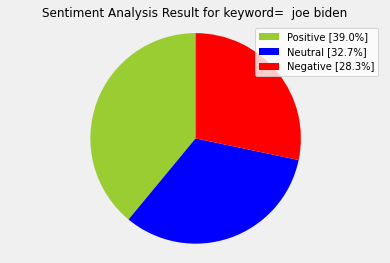

In [ ]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [ ]:
tweet_list.drop_duplicates(inplace = True)

In [ ]:
text_all = tweet_list[0].values
text_neutral = neutral_list[0].values
text_positive = positive_list[0].values
text_negative = negative_list[0].values
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @laurenboebert: I thought you were reducing...,RT @laurenboebert: I thought you were reducing...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,RT @nypost: Camilla Parker Bowles can't stop t...,RT @nypost: Camilla Parker Bowles can't stop t...,-0.050000,0.400000,negative,0.180,0.820,0.000,-0.2960
2,Segura reelección de Ortega en Nicaragua: Bide...,Segura reelección de Ortega en Nicaragua: Bide...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,President Joe Biden congratulates Big Bird for...,President Joe Biden congratulates Big Bird for...,0.000000,0.100000,negative,0.130,0.870,0.000,-0.3400
4,RT @franceinfo: Etats-Unis : la justice améric...,RT @franceinfo: Etats-Unis : la justice améric...,0.000000,0.000000,positive,0.093,0.769,0.138,0.2732
...,...,...,...,...,...,...,...,...,...
973,RT @americafirstmg: The Rumor in Rome: Did Joe...,RT @americafirstmg: The Rumor in Rome: Did Joe...,-0.800000,0.800000,negative,0.162,0.838,0.000,-0.4391
976,RT @PodcastAdRead: Call me a “completely unhin...,RT @PodcastAdRead: Call me a “completely unhin...,0.200000,0.462963,negative,0.306,0.694,0.000,-0.6833
991,Has anyone read that hilarious news story abou...,Has anyone read that hilarious news story abou...,0.183333,0.733333,positive,0.000,0.876,0.124,0.4019
993,RT @AmericannMan: IMPEACHABLE OFFENSE: Joe Bid...,RT @AmericannMan: IMPEACHABLE OFFENSE: Joe Bid...,0.500000,0.500000,negative,0.217,0.783,0.000,-0.6124


In [ ]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @laurenboebert: I thought you were reducing...,i thought you were reducing methane emissions...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,RT @nypost: Camilla Parker Bowles can't stop t...,camilla parker bowles can t stop talking abou...,-0.050000,0.400000,negative,0.180,0.820,0.000,-0.2960
2,Segura reelección de Ortega en Nicaragua: Bide...,segura reelecci n de ortega en nicaragua bide...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,President Joe Biden congratulates Big Bird for...,president joe biden congratulates big bird for...,0.000000,0.100000,negative,0.130,0.870,0.000,-0.3400
4,RT @franceinfo: Etats-Unis : la justice améric...,etats unis la justice am ricaine suspend l ...,0.000000,0.000000,positive,0.093,0.769,0.138,0.2732
5,RT @kylegriffin1: A Pennsylvania election work...,a pennsylvania election worker who was falsel...,-0.400000,0.600000,negative,0.202,0.798,0.000,-0.5106
6,RT @SheabiaForever: The inauguration of Joe Bi...,the inauguration of joe biden in addis ababa ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
7,Etats-Unis : la justice américaine suspend l'o...,etats unis la justice am ricaine suspend l o...,0.000000,0.000000,positive,0.097,0.759,0.143,0.2732
8,RT @leopardo94: Por cuanto tiempo? El recorte ...,por cuanto tiempo el recorte de libertades e...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
9,RT @mmpadellan: Good morning and Happy Sunday ...,good morning and happy sunday to everyone who...,0.766667,0.833333,positive,0.000,0.742,0.258,0.7650


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @laurenboebert: I thought you were reducing...,i thought you were reducing methane emissions...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,RT @nypost: Camilla Parker Bowles can't stop t...,camilla parker bowles can t stop talking abou...,-0.050000,0.400000,negative,0.180,0.820,0.000,-0.2960
2,Segura reelección de Ortega en Nicaragua: Bide...,segura reelecci n de ortega en nicaragua bide...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,President Joe Biden congratulates Big Bird for...,president joe biden congratulates big bird for...,0.000000,0.100000,negative,0.130,0.870,0.000,-0.3400
4,RT @franceinfo: Etats-Unis : la justice améric...,etats unis la justice am ricaine suspend l ...,0.000000,0.000000,positive,0.093,0.769,0.138,0.2732
5,RT @kylegriffin1: A Pennsylvania election work...,a pennsylvania election worker who was falsel...,-0.400000,0.600000,negative,0.202,0.798,0.000,-0.5106
6,RT @SheabiaForever: The inauguration of Joe Bi...,the inauguration of joe biden in addis ababa ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
7,Etats-Unis : la justice américaine suspend l'o...,etats unis la justice am ricaine suspend l o...,0.000000,0.000000,positive,0.097,0.759,0.143,0.2732
8,RT @leopardo94: Por cuanto tiempo? El recorte ...,por cuanto tiempo el recorte de libertades e...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
9,RT @mmpadellan: Good morning and Happy Sunday ...,good morning and happy sunday to everyone who...,0.766667,0.833333,positive,0.000,0.742,0.258,0.7650


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [ ]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [ ]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,186,40.35
positive,140,30.37
negative,135,29.28


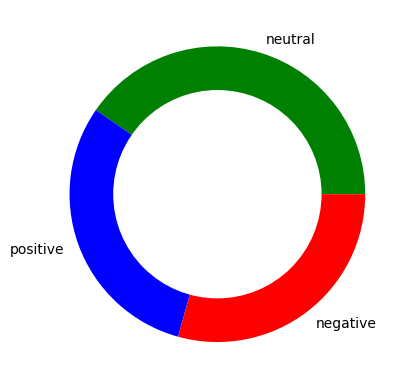

In [ ]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [ ]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,102.72
neutral,94.78
positive,107.42


In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,17.81
neutral,15.97
positive,18.98


In [ ]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [ ]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [ ]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [ ]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [ ]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @laurenboebert: I thought you were reducing...,i thought you were reducing methane emissions...,0.00,0.0,neutral,0.000,1.000,0.000,0.0000,54,8,i thought you were reducing methane emissions...,"[, i, thought, you, were, reducing, methane, e...","[, thought, reducing, methane, emissions, joe, ]","[, thought, reduc, methan, emiss, joe, ]"
1,RT @nypost: Camilla Parker Bowles can't stop t...,camilla parker bowles can t stop talking abou...,-0.05,0.4,negative,0.180,0.820,0.000,-0.2960,75,13,camilla parker bowles can t stop talking abou...,"[, camilla, parker, bowles, can, t, stop, talk...","[, camilla, parker, bowles, stop, talking, joe...","[, camilla, parker, bowl, stop, talk, joe, bid..."
2,Segura reelección de Ortega en Nicaragua: Bide...,segura reelecci n de ortega en nicaragua bide...,0.00,0.0,neutral,0.000,1.000,0.000,0.0000,118,19,segura reelecci n de ortega en nicaragua bide...,"[segura, reelecci, n, de, ortega, en, nicaragu...","[segura, reelecci, n, de, ortega, en, nicaragu...","[segura, reelecci, n, de, ortega, en, nicaragu..."
3,President Joe Biden congratulates Big Bird for...,president joe biden congratulates big bird for...,0.00,0.1,negative,0.130,0.870,0.000,-0.3400,118,18,president joe biden congratulates big bird for...,"[president, joe, biden, congratulates, big, bi...","[president, joe, biden, congratulates, big, bi...","[presid, joe, biden, congratul, big, bird, cov..."
4,RT @franceinfo: Etats-Unis : la justice améric...,etats unis la justice am ricaine suspend l ...,0.00,0.0,positive,0.093,0.769,0.138,0.2732,125,22,etats unis la justice am ricaine suspend l ...,"[, etats, unis, la, justice, am, ricaine, susp...","[, etats, unis, la, justice, ricaine, suspend,...","[, etat, uni, la, justic, ricain, suspend, l, ..."


In [ ]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

461 Number of reviews has 2082 words


In [ ]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aangenomen,aaron,ab,aba,ababa,abandon,abbi,abbot,abbott,abc,abd,abil,abram,absenc,absolut,abu,acc,access,accomplish,accord,account,accus,across,acteur,acti,activ,activist,actual,acusa,ad,adayl,add,addi,admini,administr,adolf,adolph,adopt,adult,...,woord,word,worden,wori,work,worker,worl,world,worri,wors,worst,would,wow,write,wrote,wyom,xi,xl,yahudiler,yan,yapmay,yapt,yaratt,ye,year,yeh,yell,yeni,yesidir,york,young,youtub,zamanda,zem,zero,zg,zirv,zirvesi,zogezegd,zwijgen
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
biden,396
joe,358
de,69
presid,64
la,43
n,36
trump,33
year,31
le,28
today,27
